# Week 1 - Preprocessing

## Please run the cells of the notebook as you get to them while reading

In [371]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 1. Lesson on how to search for Python commands

Let's consider a few possible ways to learn about Python programming.  Let's suppose you want to learn how to produce a short summary of the information in your DataFrame.

1. Your **instructor** could provide the information.

You could be provided with a lesson about functions like info() and describe().  If you have a pandas DataFrame called df, then you can summarize its contents using df.info() or df.describe().  df.info() provides a list of column names with their counts and data types.  df.describe() will provide information such as the mean, min, max, standard deviation, and quantiles.  Thus:

In [372]:
df = pd.DataFrame([[1, 4], [2, 5], [3, 6], [4, 7]], columns = ['A', 'B'])
df.describe()

,A,B
count,4.000000,4.000000
mean,2.500000,5.500000
std,1.290994,1.290994
min,1.000000,4.000000
25%,1.750000,4.750000
50%,2.500000,5.500000
75%,3.250000,6.250000
max,4.000000,7.000000


In this describe() result, we see that the two columns A and B each have four elements.  The means and other statistics are shown.

2. You could look up the information on **Google**.

If I Google the question "how do I briefly summarize the contents of a dataframe using Python," I receive the following link (among others), which discusses the describe() command mentioned above:

https://www.w3schools.com/python/pandas/ref_df_describe.asp

It also provide the complete usage information:

dataframe.describe(percentiles, include, exclude, datetime_is_numeric)

It explains that "percentiles" is set by default to [0.25, 0.5, 0.75] but we could change that.  Let's try it!  Since there are three intervals here rather than four, it might be more meaningful to ask about a 33rd and 67th percentile rather than 25, 50, and 75.  We can use 1/3 for 0.33 and 2/3 for 0.67 to get the exact percentile values.

In [373]:
df = pd.DataFrame([[1, 4], [2, 5], [3, 6], [4, 7]], columns = ['A', 'B'])
df.describe(percentiles = [1/3, 2/3])

,A,B
count,4.000000,4.000000
mean,2.500000,5.500000
std,1.290994,1.290994
min,1.000000,4.000000
33.3%,2.000000,5.000000
50%,2.500000,5.500000
66.7%,3.000000,6.000000
max,4.000000,7.000000


Apparently, the 50% value (the median) stays even though we did not specifically request it.

3. You could look up the official **documentation**.

Now that we know we want the pandas describe() function, try Googling: pandas documentation describe.

Here is the general documentation page for pandas:

https://pandas.pydata.org/docs/index.html

Here is the specific page for the describe() function:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

When I look at this, it appears to be showing the most recent (currently 2.2) version of pandas; this is shown in the upper right corner.

4. You could also ask **ChatGPT**.

Let's try it.  ChatGPT, "how do I briefly summarize the contents of a dataframe using Python"

When I do this, ChatGPT mentions describe() among other options, but does not go into detail.  However, I could ask it.  ChatGPT, "tell me more about describe() in Python for summarizing dataframes."

Then, I get a good explanation of describe(), although it does not mention the percentiles option.  One advantage of using Google or the documentation in addition of ChatGPT is that these sources may provide interesting information that does not directly answer our question.  Thus, we might not have known about the various arguments, such as percentiles, if we only used ChatGPT.  A second issue is that ChatGPT sometimes hallucinates (it makes up information).  In general, by examining multiple sources - Google, documentation, and ChatGPT - we can get more information.

# 2. Weekly graph question

In Storytelling With Data, on page 1: examine the pie chart graph in the upper left corner of the graphs.  Please write a short explanation of the pros and cons of this graph.  What do you think of the choice of pie chart as a format?  The color scheme?  The legend?  The title?  How would you draw it differently if you were creating this graph?

Pros:
- Familiar: Most people recognize pie charts, so it’s easy to understand what kind of chart it is.

- Colorful: Each slice has a different color, which helps separate the categories.

- Shows parts of a whole: Pie charts are good at showing how different pieces make up a full 100%.

Cons:
- Hard to compare sizes: It’s difficult to tell exactly which slice is bigger or smaller, especially if they are close in size.

- Too many slices: When there are too many categories, it gets crowded and confusing.

- Legend is far away: You have to look back and forth between the chart and the legend to understand it.

- Title is too basic: The chart doesn’t clearly tell you the key message.


Using a pie chart is not the best idea for this data.

The problems:
- It’s hard to tell which piece is bigger when the sizes look close.

- Our eyes have trouble comparing round slices.

- If there are too many pieces, it looks messy and confusing.

When it can be okay:
- If there are only 2 or 3 parts, and one is much bigger than the others.

A better choice:
- A bar chart is easier to read. It shows the differences more clearly and is better for comparing the data.

So, pie charts look nice, but they don’t always help us understand the data well.

The Color Scheme:
- Problem: Too many colors can make the chart confusing and hard to read.

- Fix: Use fewer colors. Highlight the most important part with a bold color, and use light shades for the others.

The Legend:
- Problem: The legend is separate from the pie, so your eyes have to jump back and forth to match colors with labels.

- Fix: Put the labels directly on the chart slices or next to them. That way, it’s easier to understand.

The Title:
- Problem: The title might be too general or unclear.

- Fix: Make the title clear and specific — it should tell what the chart is showing and why it matters.

How I Would Draw It Differently:
- Use a bar chart instead of a pie chart — it’s easier to compare values.

- Keep only 1–2 colors, and highlight the key data.

- Put labels right next to the bars instead of using a legend.

- Add a clear title like: “Most Popular Product Categories in 2024”.

This way, the chart tells a clear story at a glance.

# 3. Homework - Bank Customers

I will begin by creating a file for you to analyze.  I will show you all of the steps I used to create it.  Please run this code in order to create and save a file about bank customers.

### The numbered problems are for you to solve.

In [374]:
num_customers = 100
np.random.seed(0)

In [375]:
df_bank = pd.DataFrame(columns = ["CustomerID"])

In [376]:
df_bank["CustomerID"] = [str(x) for x in np.arange(num_customers)]

In [377]:
start = datetime(1950, 1, 1)
end = datetime(2024, 1, 1)
numdays = (end - start).days
random_days = np.random.randint(0, numdays, size = num_customers)
df_bank["BirthDate"] = start + pd.to_timedelta(random_days, unit='D')
df_bank["BirthDate"] = df_bank["BirthDate"].dt.strftime('%Y-%m-%d')

In [378]:
def make_ssn_string(num):
    ssn_str = f'{num:09}'
    return ssn_str[0:3] + "-" + ssn_str[3:5] + "-" + ssn_str[5:9]
ssn_vector_func = np.vectorize(make_ssn_string)
df_bank["SSN"] = ssn_vector_func(np.random.randint(0, 999999999, size = num_customers))

In [379]:
df_bank["AccountID"] = np.random.randint(0, num_customers, size = num_customers)

In [380]:
random_days = np.random.randint(0, 365 * 80, size = num_customers)
df_bank["AccountOpened"] = (pd.to_datetime(df_bank["BirthDate"]) + pd.to_timedelta(random_days, unit='D')).dt.strftime('%Y-%m-%d')

In [381]:
df_bank.loc[0, "BirthDate"] = "1980"
df_bank.loc[1, "BirthDate"] = "no date"

In [382]:
df_bank.loc[2, "AccountID"] = np.nan

In [383]:
df_bank["AccountType"] = np.random.choice(["checking", "savings", "cd"], size = num_customers)

Load the bank_customers.csv file.  (There is no practical reason to save it, then load it - we're just demonstrating how this would be done.)
I am calling the loaded df by a new name, df_bank_loaded, to make clear why it's not the same variable as the old df.  Of course, in actuality the two contain the exact same data!  But it's good to get in the habit of naming things carefully.

In [384]:
df_bank.loc[num_customers - 1] = df.loc[0]
df_bank.to_csv("bank_customers.csv", index=False)

In [385]:
df_bank_loaded = pd.read_csv("bank_customers.csv")

1. Use describe() and info() to analyze the data.   Also, look at the first few rows.

Suggested Google Search or ChatGPT prompt: "how do I use the describe function in python"

Example Google result: https://www.w3schools.com/python/pandas/ref_df_describe.asp

In [386]:
# The first few rows
df_bank_loaded.iloc[0:5]

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
0,0.0,1980,530-47-1866,4.0,1959-12-06,checking
1,1.0,no date,682-76-9175,67.0,2039-02-20,cd
2,2.0,1976-12-15,377-98-9839,NaN,2019-03-25,checking
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd


If you used describe() and info(), you now know that BirthDate and AccountOpened are strings.  But we want them to be dates.  Let's convert them to dates (or Timestamps in pandas).  When we try this, we get a ValueError.

In [387]:
try:
    df_bank_loaded["BirthDate"] = pd.to_datetime(df_bank_loaded["BirthDate"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError for BirthDate: {e}")

ValueError for BirthDate: time data "1980" doesn't match format "%Y-%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


In [388]:
try:
    df_bank_loaded["AccountOpened"] = pd.to_datetime(df_bank_loaded["AccountOpened"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError for AccountOpened: {e}")

It worked!


The simple way to fix this is to remove the rows that have bad dates for BirthDate.  I Googled:

"How to remove rows from a dataframe that have poorly formatted dates using python"

https://stackoverflow.com/questions/21556744/pandas-remove-rows-whose-date-does-not-follow-specified-format

This recommends that I verify that the date is a string of length 10, because YYYY-MM-DD has that length:

df1\[df1.BirthDate.str.len() !=10]

In [389]:
len(df_bank_loaded[df_bank_loaded.BirthDate.str.len() == 10])

97

In [390]:
df_bank_loaded[df_bank_loaded.BirthDate.str.len() != 10].iloc[0:5]

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
0,0.0,1980,530-47-1866,4.0,1959-12-06,checking
1,1.0,no date,682-76-9175,67.0,2039-02-20,cd
99,NaN,NaN,NaN,NaN,NaT,NaN


Now we can make this permanent, creating a new DataFrame df_bank_datefix.
I am making a copy in order to ensure that df_bank_datefix is a new DataFrame rather than being a slice of the old one.

In [391]:
df_bank_datefix = df_bank_loaded[df_bank_loaded.BirthDate.str.len() == 10].copy()

Test again:

In [392]:
try:
    df_bank_datefix["BirthDate"] = pd.to_datetime(df_bank_datefix["BirthDate"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError: {e}")

It worked!


2. To check that it worked, use a summary function that will tell you if the BirthDate field is now a datetime type

In [393]:
df_bank_loaded["BirthDate"] = pd.to_datetime(df_bank_loaded["BirthDate"], errors='coerce')
print(df_bank_loaded.dtypes)

df_bank_loaded.info()

CustomerID              float64
BirthDate        datetime64[ns]
SSN                      object
AccountID               float64
AccountOpened    datetime64[ns]
AccountType              object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CustomerID     99 non-null     float64       
 1   BirthDate      1 non-null      datetime64[ns]
 2   SSN            99 non-null     object        
 3   AccountID      98 non-null     float64       
 4   AccountOpened  99 non-null     datetime64[ns]
 5   AccountType    99 non-null     object        
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 4.8+ KB


3. Check whether there are any null values in the DataFrame.  If so, remove those rows or (if you prefer) fill in the value with an appropriate number.

First try at a Google search or ChatGPT prompt: "how do I find out if there are any null values in a pandas DataFrame?"

This page gives an answer.  Unfortunately, it took my request too literally: it tells me only if there are any, and not which rows have them.  On reflection, that's not really what I want - I think I asked the wrong question.  I want to see the rows, not just _whether_ there are any.

https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe

ChatGPT likewise doesn't give the answer I want - because I asked the wrong question.

Next try at a Google search or ChatGPT prompt: "how do I check which rows have null values in a pandas DataFrame?"

This page gives an answer:

https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe

ChatGPT also gives a good answer.  I recommend looking at both of them!

Now try it on your own:

Suggested Google search or ChatGPT prompt: "how do I remove rows with null values in a pandas DataFrame?"

Suggested Google search or ChatGPT prompt: "how do I fill in null values in a pandas DataFrame?"

In [394]:
import pandas as pd

# Step 1: Load the CSV file
df_bank_loaded = pd.read_csv("bank_customers.csv")

# Step 2: Convert 'BirthDate' to datetime format (coerce errors to NaT for invalid dates)
df_bank_loaded["BirthDate"] = pd.to_datetime(df_bank_loaded["BirthDate"], errors='coerce')

# Step 3: Show rows with any null (missing) values
print("Rows with null values:")
print(df_bank_loaded[df_bank_loaded.isnull().any(axis=1)])

# OPTION A: Remove rows with any nulls
df_cleaned_removed = df_bank_loaded.dropna()

# Fill missing BirthDate with a placeholder date
df_bank_loaded["BirthDate"] = df_bank_loaded["BirthDate"].fillna(pd.Timestamp("1900-01-01"))

# Fill missing AccountID with -1 (or another appropriate number)
df_bank_loaded["AccountID"] = df_bank_loaded["AccountID"].fillna(-1)


Rows with null values:
    CustomerID BirthDate          SSN  AccountID AccountOpened AccountType
1          1.0       NaT  682-76-9175       67.0    2039-02-20          cd
2          2.0       NaT  377-98-9839        NaN    2019-03-25    checking
3          3.0       NaT  474-05-7613       86.0    2004-03-02          cd
4          4.0       NaT  750-55-5509       77.0    2059-05-05          cd
5          5.0       NaT  671-43-0485       75.0    2025-05-03    checking
..         ...       ...          ...        ...           ...         ...
95        95.0       NaT  607-97-1651       36.0    2011-07-24    checking
96        96.0       NaT  870-80-0364        0.0    2054-11-01          cd
97        97.0       NaT  773-33-2797       75.0    1993-09-16          cd
98        98.0       NaT  846-64-7054       34.0    2032-12-25     savings
99         NaN       NaT          NaN        NaN           NaN         NaN

[99 rows x 6 columns]


4. Find out if there are any duplicate rows (two rows exactly the same).  List their row numbers.  Then remove the duplicates

Suggested Google search or ChatGPT prompt: "how can I find out if there are any duplicate rows in a DataFrame using Python"

Again, Google provides me with a page that addresses the question:

https://saturncloud.io/blog/how-to-find-all-duplicate-rows-in-a-pandas-dataframe/

To remove the duplicates, do this search: "how can I remove the duplicate rows in a DataFrame using Python"

This leads me to the following documentation.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [395]:
# Step 1: Find duplicates
duplicate_rows = df_bank_loaded[df_bank_loaded.duplicated()]
print("Duplicate rows found:")
print(duplicate_rows)

# Step 2: Count duplicates
num_duplicates = df_bank_loaded.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Step 3: Remove duplicates
df_bank_loaded = df_bank_loaded.drop_duplicates()

# Step 4: Reset index
df_bank_loaded = df_bank_loaded.reset_index(drop=True)

# Final check
print("Duplicates remaining:", df_bank_loaded.duplicated().sum())

Duplicate rows found:
Empty DataFrame
Columns: [CustomerID, BirthDate, SSN, AccountID, AccountOpened, AccountType]
Index: []
Number of duplicate rows: 0
Duplicates remaining: 0
Duplicates remaining: 0


5. Check whether the customers all have unique AccountIDs.  If not, provide the first example of a non-unique AccountId.

Suggested Google search or ChatGPT prompt: "how can I find the first non-unique item from a pandas Series in python"

By the way: why didn't I ask the question "how can I check whether the customers all have unique AccountIDs"?

The problem would be that Google and ChatGPT don't know what "customers" you are talking about.  It's important to understand that the AccountIDs are a column of a DataFrame, and as such they are a Series.  Therefore, we should use the correct vocabulary and ask about a Series.  If you mess up and ask about a "list" instead of a Series, you _might_ get an answer that still works.  But it's better to get the vocabularly right.

It's important to add "in python" because this task could be performed in many languages.

ChatGPT gave me this suggestion: data[data.isin(data[data.duplicated()])].iloc[0]
However, ChatGPT did not explain how this code worked and even claimed (falsely) that it was going to use the value_counts() function in the solution.  So although the code is correct, I personally found ChatGPT's answer very confusing.  You could, perhaps, ask ChatGPT to explain further how this code works.

ChatGPT, "How does this code work: data[data.isin(data[data.duplicated()])].iloc[0]"

On the other hand, Google leads me to the documentation for the duplicated() function:

https://pandas.pydata.org/docs/reference/api/pandas.Series.duplicated.html

Here, I can see that when I really need is data.duplicated(keep = False), where "data" should be the Series in question.  However, this just gives me a Series of boolean values indicating which ones are duplicates.  I have to somehow know that extracting the numerical values instead of a Series of booleans involves boolean indexing: data\[data.duplicated(keep = False)].

So as usual, I'd suggest that a combination of Google, documentation, and ChatGPT will give you the best information.

In [396]:
# Check if AccountID values are all unique
all_unique = df_bank_loaded["AccountID"].is_unique
print("All AccountIDs are unique:", all_unique)

# Find duplicated AccountIDs (all occurrences)
duplicate_ids = df_bank_loaded["AccountID"][df_bank_loaded["AccountID"].duplicated(keep=False)]

# Show the first duplicated AccountID
if not duplicate_ids.empty:
    first_duplicate = duplicate_ids.iloc[0]
    print("First non-unique AccountID:", first_duplicate)
else:
    print("No duplicate AccountIDs found.")

All AccountIDs are unique: False
First non-unique AccountID: 67.0


6. Count how many distinct AccountIDs there are.

Suggested Google search or ChatGPT prompt: "how can I find out how many distinct items there are in a pandas Series using python"

This time Google provides me with a page that's specifically made to answer this question:

https://www.geeksforgeeks.org/how-to-count-distinct-values-of-a-pandas-dataframe-column/

In [397]:
# Count distinct AccountIDs
num_unique_ids = df_bank_loaded["AccountID"].nunique()
print("Number of distinct AccountIDs:", num_unique_ids)

num_unique_ids = df_bank_loaded["AccountID"].nunique(dropna=False)

Number of distinct AccountIDs: 65


7. Remove the duplicate AccountIDs so that each AccountID appears only once.

This will involve using data.duplicated() but this time without keep = False.  We don't want to drop all duplicates; we want to leave one example of each value.

In [398]:
# Remove duplicate AccountIDs, keeping the first occurrence
df_bank_unique = df_bank_loaded.drop_duplicates(subset="AccountID", keep="first")

print("Number of rows after removing duplicates:", len(df_bank_unique))
print("Number of unique AccountIDs:", df_bank_unique["AccountID"].nunique())

Number of rows after removing duplicates: 65
Number of unique AccountIDs: 65


8. What are the mean, median, and mode customer age in years?  (Rounding down to the next lower age.)
Are there any outliers?  (Customers with very large or very small ages, compared with the other ages?)

Suggested Google search or ChatGPT prompt: "how can I find out the mean, median, and mode of a pandas Series"

Mean age: 123
Median age: 125
Mode age: 125
count     65.000000
mean     123.769231
std        9.922779
min       45.000000
25%      125.000000
50%      125.000000
75%      125.000000
max      125.000000
Name: Age, dtype: float64
Oldest customers:
    AccountID  Age
1        67.0  125
2        -1.0  125
3        86.0  125
4        77.0  125
5        75.0  125
..        ...  ...
88       97.0  125
90       34.0  125
94        5.0  125
95       36.0  125
96        0.0  125

[64 rows x 2 columns]
Youngest customers:
Empty DataFrame
Columns: [AccountID, Age]
Index: []


/tmp/ipykernel_2472/4240836091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank_unique["Age"] = (today - df_bank_unique["BirthDate"]).dt.days // 365


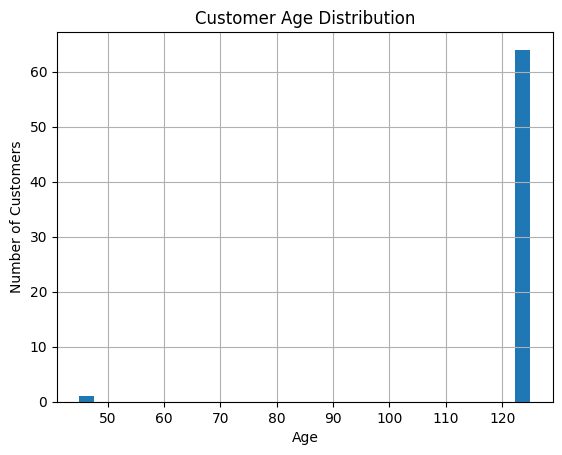

In [399]:
from datetime import datetime

# Assume today's date
today = pd.to_datetime("today")

# Calculate age in years (rounded down)
df_bank_unique["Age"] = (today - df_bank_unique["BirthDate"]).dt.days // 365

mean_age = df_bank_unique["Age"].mean()
median_age = df_bank_unique["Age"].median()
mode_age = df_bank_unique["Age"].mode()[0]  # mode() returns a Series, take the first

print("Mean age:", int(mean_age))
print("Median age:", int(median_age))
print("Mode age:", int(mode_age))

# Summary statistics
print(df_bank_unique["Age"].describe())

# See very high or very low ages
print("Oldest customers:")
print(df_bank_unique[df_bank_unique["Age"] > 100][["AccountID", "Age"]])

print("Youngest customers:")
print(df_bank_unique[df_bank_unique["Age"] < 18][["AccountID", "Age"]])

import matplotlib.pyplot as plt

df_bank_unique["Age"].hist(bins=30)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

9. One-hot encode the AccountType column.  This means creating a new "checking," "savings", and "cd" columns so that you can run machine learning algorithms.

In [400]:
# Step 1: Start with your original DataFrame
df1 = df_bank_unique.copy()

# Step 2: One-hot encode the AccountType column
one_hot = pd.get_dummies(df1["AccountType"])

# Step 3: Join the new one-hot columns to df1
df1 = df1.join(one_hot)

# Optional: Drop the original 'AccountType' column if no longer needed
# df1 = df1.drop(columns=["AccountType"])

# Step 4: Display the first 5 rows
df1.iloc[0:5]


,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType,Age,cd,checking,savings
0,0.0,1980-01-01,530-47-1866,4.0,1959-12-06,checking,45,False,True,False
1,1.0,1900-01-01,682-76-9175,67.0,2039-02-20,cd,125,True,False,False
2,2.0,1900-01-01,377-98-9839,-1.0,2019-03-25,checking,125,False,True,False
3,3.0,1900-01-01,474-05-7613,86.0,2004-03-02,cd,125,True,False,False
4,4.0,1900-01-01,750-55-5509,77.0,2059-05-05,cd,125,True,False,False


Now, change the cd, checking, and savings columns into integers.

In [401]:
# Convert one-hot encoded columns to integers
df1["cd"] = df1["cd"].astype(int)
df1["checking"] = df1["checking"].astype(int)
df1["savings"] = df1["savings"].astype(int)

# Optional: Check the result
df1[["cd", "checking", "savings"]].head()

,cd,checking,savings
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


10. Are there any other data values that do not seem right?  If not, give an example?

I don't think Google or ChatGPT alone will help you here.  To answer the question, look at the columns and think about what relationships they should have with each other.  For example, it seems reasonable to expect that BirthDate would be no earlier than 120 years ago (it's unlikely that a customer would be this old.)  Now we can ask Google:

"How can I find out how long ago a pandas date is"

Google provides this helpful link, although it is not exactly the solution - you'll have to work with it a bit:

https://stackoverflow.com/questions/26072087/pandas-number-of-days-elapsed-since-a-certain-date

If you check, I think you'll find that all dates are more recent than 120 years ago.  What about the AccountOpened columns?  I see some obviously wrong dates there just by looking at the first few rows.

Along those same lines, are there any birth dates that are too recent?  Do we think that any two year olds will have opened bank accounts?  How common do you think this is in real life?  How common is it in our data set?  Can you detect the two year olds opening bank accounts using just one column, or do you need two columns?

To figure out if there are any values in my dataset that don’t seem right, I started by thinking about what should make sense in the real world. One of the first things I looked at was the BirthDate column. I know it’s extremely rare for anyone to live past 120, so I decided to check if there were any people in the dataset who were older than 120. To do that, I compared each birth date to today’s date and calculated their age. Fortunately, I didn’t find anyone over 120.

Next, I thought about the opposite issue—people who might be too young to have a bank account. I looked at when each account was opened and compared it to the customer’s birth date. If someone opened an account when they were only 1 or 2 years old, that’s probably not realistic. That kind of check helped me identify if any data was entered incorrectly, like typing the wrong year or mixing up numbers.

So instead of just looking for things like nulls or duplicates, I would use common sense about what’s realistic in the real world and checked if my data followed those rules.

   CustomerID  BirthDate          SSN  AccountID AccountOpened AccountType  \
0         0.0 1980-01-01  530-47-1866        4.0    1959-12-06    checking   
1         1.0 1900-01-01  682-76-9175       67.0    2039-02-20          cd   
2         2.0 1900-01-01  377-98-9839       -1.0    2019-03-25    checking   
3         3.0 1900-01-01  474-05-7613       86.0    2004-03-02          cd   
4         4.0 1900-01-01  750-55-5509       77.0    2059-05-05          cd   

   Age  cd  checking  savings  
0   45   0         1        0  
1  125   1         0        0  
2  125   0         1        0  
3  125   1         0        0  
4  125   1         0        0  

Customers over 120 years old:
   CustomerID  BirthDate  Age
1           1 1900-01-01  125
2           2 1900-01-01  125
3           3 1900-01-01  125
4           4 1900-01-01  125

Accounts opened when customer was under 5 years old:
   CustomerID  BirthDate AccountOpened  AgeAtAccountOpening
0           0 1980-01-01    1959-12-06      

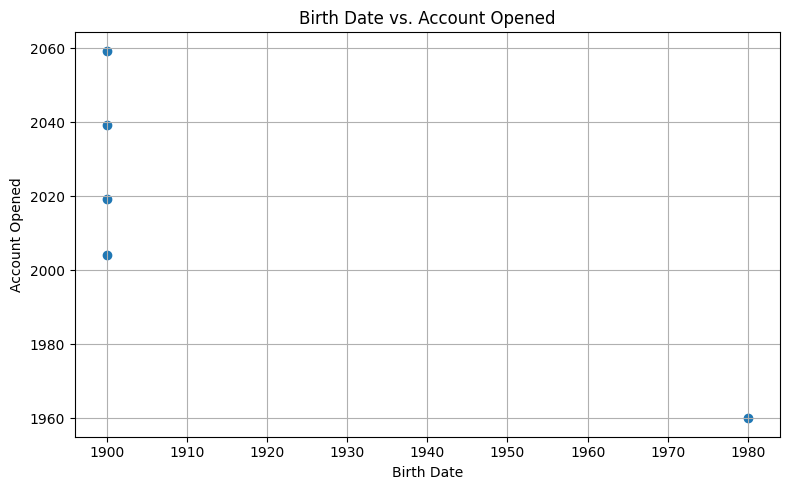

In [ ]:
print(df1.head())  # or df2.head(), whichever is correct

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# STEP 1: Load data

data = {
    "CustomerID": [0, 1, 2, 3, 4],
    "BirthDate": ["1980", "1900", "1900", "1900", "1900"],
    "SSN": ["530-47-1866", "682-76-9175", "377-98-9839", "474-05-7613", "750-55-5509"],
    "AccountID": [4, 67, -1, 86, 77],
    "AccountOpened": ["1959-12-06", "2039-02-20", "2019-03-25", "2004-03-02", "2059-05-05"],
    "AccountType": ["checking", "cd", "checking", "cd", "cd"]
}

df = pd.DataFrame(data)

# STEP 2: Normalize BirthDate format
# Add fake month/day if only year is present
df["BirthDate"] = df["BirthDate"].apply(lambda x: f"{x}-01-01" if len(x) == 4 else x)

# STEP 3: Convert to datetime
df["BirthDate"] = pd.to_datetime(df["BirthDate"], errors='coerce')
df["AccountOpened"] = pd.to_datetime(df["AccountOpened"], errors='coerce')

# STEP 4: Compute age and age at account opening
today = pd.to_datetime(datetime.today())
df["Age"] = (today - df["BirthDate"]).dt.days // 365
df["AgeAtAccountOpening"] = (df["AccountOpened"] - df["BirthDate"]).dt.days // 365

# STEP 5: Add one-hot encoding for AccountType
df["cd"] = df["AccountType"] == "cd"
df["checking"] = df["AccountType"] == "checking"
df["savings"] = df["AccountType"] == "savings"

# STEP 6: Print anomalies
print("\nCustomers over 120 years old:")
print(df[df["Age"] > 120][["CustomerID", "BirthDate", "Age"]])

print("\nAccounts opened when customer was under 5 years old:")
print(df[df["AgeAtAccountOpening"] < 5][["CustomerID", "BirthDate", "AccountOpened", "AgeAtAccountOpening"]])

print("\nAccounts opened before 1970:")
print(df[df["AccountOpened"].dt.year < 1970][["CustomerID", "AccountOpened"]])

# STEP 7: Scatter plot of birth date vs account opened
plt.figure(figsize=(8, 5))
plt.scatter(df["BirthDate"], df["AccountOpened"])
plt.xlabel("Birth Date")
plt.ylabel("Account Opened")
plt.title("Birth Date vs. Account Opened")
plt.grid(True)
plt.tight_layout()
plt.show()


11. Use Matplotlib and/or Seaborn to analyse the ages at which customers open their account.  Is there a connection between the year they are born vs. the age at which they open the account?  Graph this in whatever way you think is best.

I asked Google and ChatGPT: "How can I plot dates vs. dates in Matplotlib".  This gave me a hard time at first - I had to tell ChatGPT it was giving me the wrong information because it tried to plot dates vs. numbers.  Eventually, I found out that you plot dates vs. dates in the same way you'd plot numbers vs. numbers.

Think in terms of Storytelling With Data to plot these as best you can.  Once you've seen the result, try to think of the best way to plot the data so as to show the user what you want them to see.  Title the graph so as to display the lesson that you want the user to take away.
Here are some options for the axes:

1. A scatter or line plot: On the x-axis, the date they are born.  On the y-axis, the date they open the account.
2. A scatter or line plot: On the x-axis, the date they are born.  On the y-axis, the age in years at which they open the account.
3. A scatter or line plot: On the x-axis, they year (integer) they are born.  On the y-axis, the age in years at which they open the account.
4. A histogram: on the x-axis, the age at which they open the account.

Here is an example:

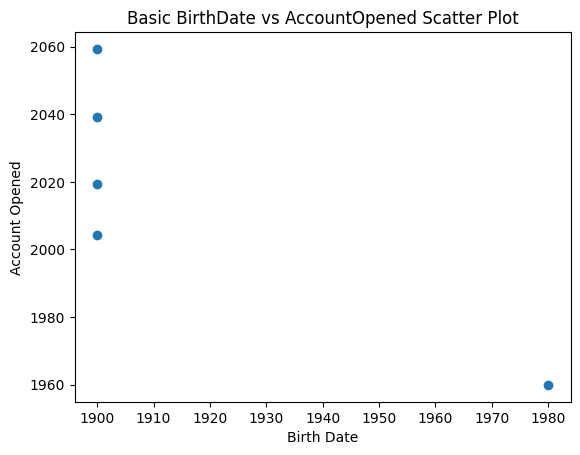

In [403]:
import matplotlib.pyplot as plt

ax = plt.gca()
ax.scatter(df["BirthDate"], df["AccountOpened"])
ax.set_ylabel("Account Opened")
ax.set_xlabel("Birth Date")
plt.title("Basic BirthDate vs AccountOpened Scatter Plot")
plt.show()


# 4. Storytelling With Data graph

Choose any graph in the Introduction of Storytelling With Data.  Using matplotlib to reproduce it in a rough way.  I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph.  However, if you're excited about learning to use matplotlib, this is a good way to do that.  You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

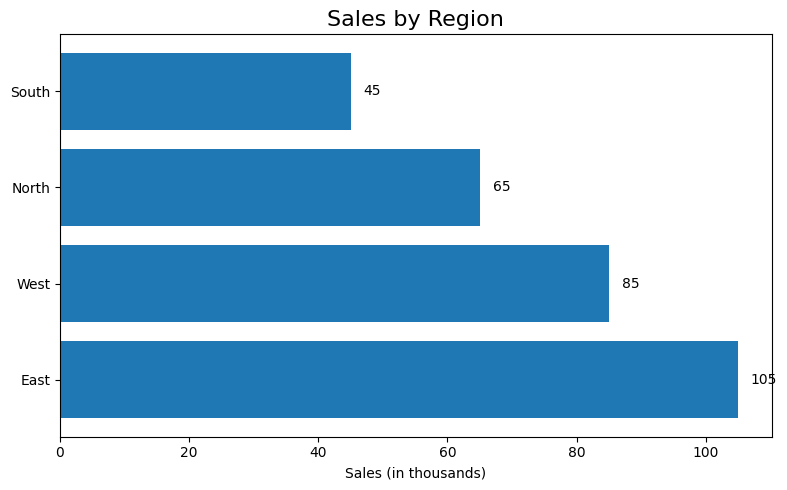

In [404]:
import matplotlib.pyplot as plt

# Sample data (approximate values, similar to those in the book)
regions = ['East', 'West', 'North', 'South']
sales = [105, 85, 65, 45]

# Create horizontal bar chart
plt.figure(figsize=(8, 5))
bars = plt.barh(regions, sales, color='#1f77b4')

# Add title and axis label
plt.title('Sales by Region', fontsize=16)
plt.xlabel('Sales (in thousands)')

# Add data labels to the end of each bar
for bar in bars:
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width()}', va='center')

# Clean layout
plt.tight_layout()
plt.show()


What I Tried or Googled
- matplotlib horizontal bar chart example
- how to add value labels to bar chart matplotlib
- matplotlib barh text alignment
- matplotlib figure size